In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
intake=pd.read_csv('../input/animal-shelter-analytics/Austin_Animal_Center_Intakes.csv')


In [3]:
outcome=pd.read_csv('../input/animal-shelter-analytics/Austin_Animal_Center_Outcomes.csv')

# Both datasets have duplicate ids and after joining them count of  null values were so much so it is best to analyse both datasets one by one 

In [4]:
intake.head()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,01/03/2019 04:19:00 PM,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,07/05/2015 12:59:00 PM,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,04/14/2016 06:43:00 PM,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,NaN,10/21/2013 07:59:00 AM,10/21/2013 07:59:00 AM,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A682524,Rio,06/29/2014 10:38:00 AM,06/29/2014 10:38:00 AM,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray


# Only name column has null values 

<AxesSubplot:>

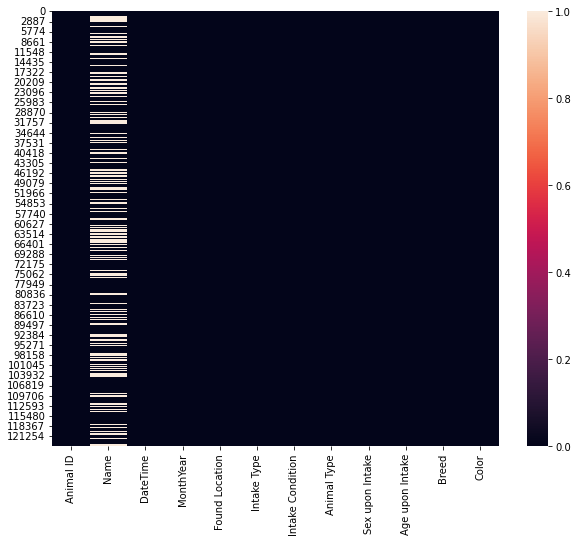

In [5]:
plt.subplots(figsize=(10,8))
sns.heatmap(intake.isnull())

In [6]:
intake.duplicated().sum()

19

In [7]:
intake.drop_duplicates(inplace=True)

In [8]:
intake.shape

(124101, 12)

# Renaming column names 

In [9]:
intake.rename(columns={'Animal ID':'id','DateTime':'date_time','MonthYear':'month_year','Found Location':'found_location','Intake Type':'intake_type','Intake Condition':'intake_condition','Animal Type':'animal_type','Sex upon Intake':'sex_upon_intake','Age upon Intake':'age_upon_intake','Breed':'breed'},inplace=True)

# Removing Monthyear column because it is similar to Datetime column and extracting month,year from Datetime column

In [10]:
intake.drop('month_year',axis=1,inplace=True)

In [11]:
intake['date_time']=intake['date_time'].astype('datetime64[ns]')

In [12]:
intake['year']=intake['date_time'].dt.year
intake['month']=intake['date_time'].dt.month

# which month,year has most animal intakes ?

# 2019 has most animal intakes

<AxesSubplot:ylabel='year'>

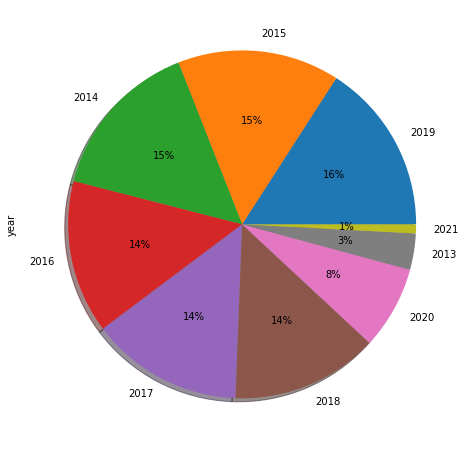

In [13]:
plt.subplots(figsize=(10,8))

intake['year'].value_counts().plot(kind='pie',autopct='%.0f%%',shadow=True)

# May month has most animal intakes  

<AxesSubplot:ylabel='Months'>

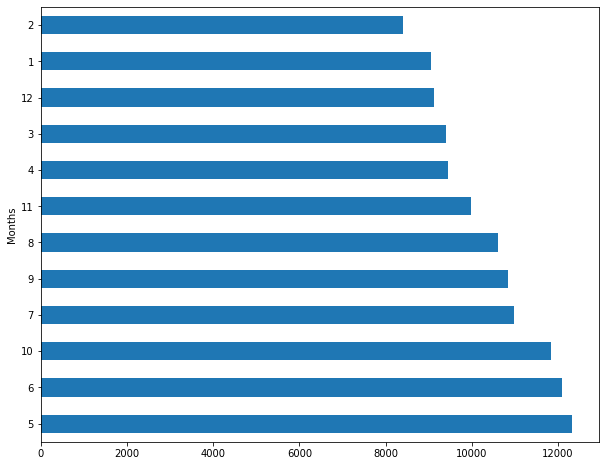

In [14]:
plt.subplots(figsize=(10,8))
plt.ylabel('Months')
intake['month'].value_counts().plot(kind='barh')

# What are the animal intake methods ?

<AxesSubplot:title={'center':' Animal intake methods'}, xlabel='intake_type'>

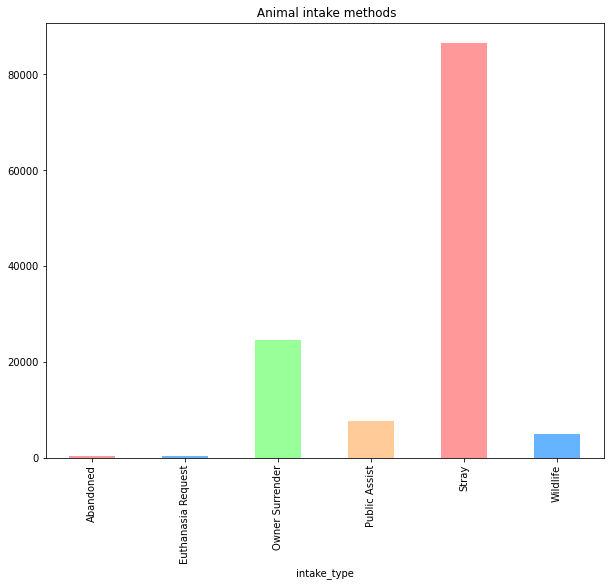

In [15]:
plt.subplots(figsize=(10,8))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.title(' Animal intake methods')

intake.groupby('intake_type')['id'].count().plot(kind='bar',color=colors)

# what are the  conditions of animals which are taken into the shelter 

In [16]:
intake.groupby('intake_type')['intake_condition'].value_counts()

intake_type         intake_condition
Abandoned           Normal                233
                    Nursing                32
                    Sick                   11
                    Medical                 4
                    Injured                 3
Euthanasia Request  Sick                  105
                    Normal                 87
                    Aged                   43
                    Injured                20
                    Other                   2
Owner Surrender     Normal              22829
                    Sick                  835
                    Injured               463
                    Nursing               289
                    Aged                   94
                    Other                  41
                    Medical                16
                    Pregnant               14
                    Behavior               10
                    Feral                   9
Public Assist       Normal               70

# How many types of animals are taken into shelter and what is their total count 

In [17]:
intake.groupby('intake_type')['animal_type'].value_counts()

intake_type         animal_type
Abandoned           Dog              161
                    Cat              106
                    Other             16
Euthanasia Request  Dog              182
                    Cat               58
                    Other             14
                    Bird               3
Owner Surrender     Dog            14813
                    Cat             9126
                    Other            599
                    Bird              61
                    Livestock          1
Public Assist       Dog             6144
                    Cat             1037
                    Other            308
                    Bird             128
                    Livestock          1
Stray               Dog            49138
                    Cat            36121
                    Other            880
                    Bird             289
                    Livestock         20
Wildlife            Other           4790
                    Bird 

# what are the top 10  breeds in the animal shelter 

<AxesSubplot:>

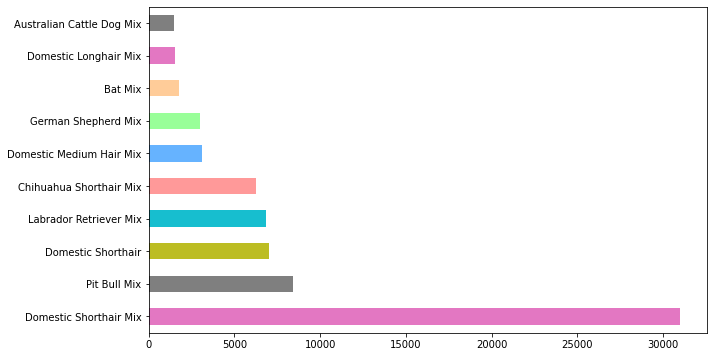

In [18]:
plt.subplots(figsize=(10,6))
color=['#e377c2', '#7f7f7f', '#bcbd22', '#17becf','#ff9999','#66b3ff','#99ff99','#ffcc99']
intake['breed'].value_counts().head(10).plot(kind='barh',color=color)

# What are top 20 common names of animals in animal shelter 
# max,bella,luna are the most commonly used names

<AxesSubplot:>

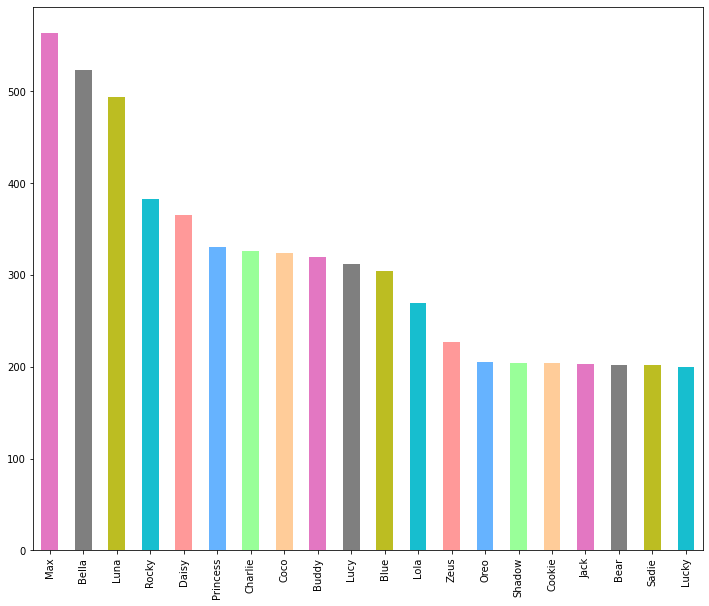

In [19]:
plt.subplots(figsize=(12,10))
color=['#e377c2', '#7f7f7f', '#bcbd22', '#17becf','#ff9999','#66b3ff','#99ff99','#ffcc99']
intake['Name'].value_counts().head(20).plot(kind='bar',color=color)

# Frequent words in Name column 

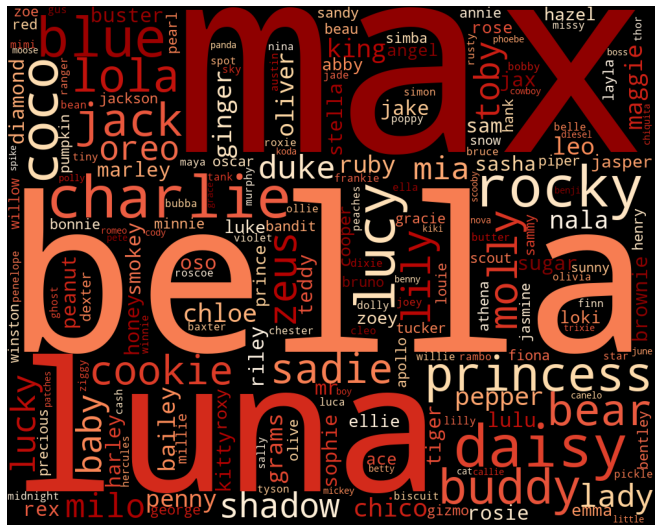

In [20]:
from wordcloud import WordCloud, STOPWORDS
stopwords=set(STOPWORDS)
comment_words=''
for line in intake.Name.dropna():
    words=line.lower().split()
    comment_words +=' '.join(words)+' '
wordcloud = WordCloud(width = 1000, height = 800, background_color ='black',colormap='OrRd', stopwords = stopwords, min_font_size = 10).generate(comment_words)
plt.figure(figsize = (9, 9), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()


In [21]:
outcome.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,05/08/2019 06:20:00 PM,05/08/2019 06:20:00 PM,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,07/18/2018 04:02:00 PM,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A821648,NaN,08/16/2020 11:38:00 AM,08/16/2020 11:38:00 AM,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
3,A720371,Moose,02/13/2016 05:59:00 PM,02/13/2016 05:59:00 PM,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
4,A674754,NaN,03/18/2014 11:47:00 AM,03/18/2014 11:47:00 AM,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby


# From the below graph you can see that most of the animals were adopted but it's sad to see that some of them were euthanised and died

<AxesSubplot:xlabel='Outcome Type'>

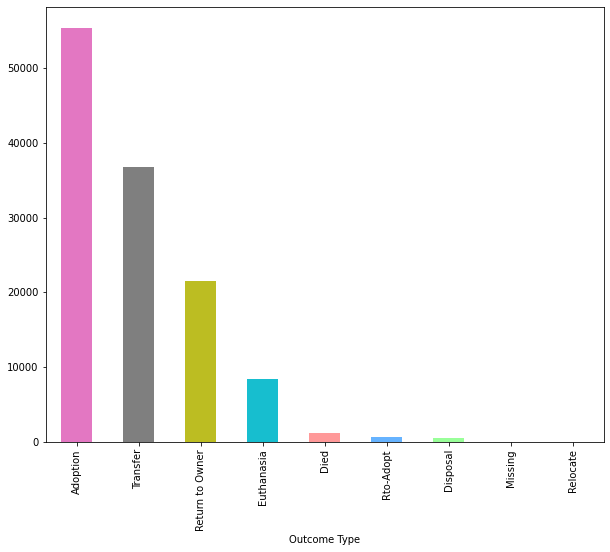

In [22]:
plt.subplots(figsize=(10,8))
color=['#e377c2', '#7f7f7f', '#bcbd22', '#17becf','#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.xlabel('Outcome Type')
outcome['Outcome Type'].value_counts().plot(kind='bar',color=color)

# As you can see that Dogs,cats were either adopted or returned to their owners and other animals like pigs,racoon etc were mostly euthanised 

In [23]:
outcome.groupby('Animal Type')['Outcome Type'].value_counts()

Animal Type  Outcome Type   
Bird         Adoption             205
             Transfer             171
             Euthanasia           118
             Return to Owner       33
             Disposal              28
             Died                  19
             Relocate              10
             Missing                1
Cat          Adoption           21391
             Transfer           20273
             Return to Owner     2209
             Euthanasia          1943
             Died                 689
             Rto-Adopt            143
             Disposal              76
             Missing               34
             Relocate               2
Dog          Adoption           33222
             Return to Owner    19225
             Transfer           15382
             Euthanasia          1797
             Rto-Adopt            554
             Died                 257
             Disposal              36
             Missing               30
Livestock    Adoption

# That's it for now
# If you like my work, do cast an upvote, it helps!
# Tell me your feedback in the comments 